# Steps we will be performing


*   Date understanding
*   Data Cleaning
*   Data Preparation
*   Model Building
*   Model Evaluation








In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import plotly.express as px
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [152]:
import warnings
warnings.filterwarnings('ignore')

In [153]:
# Look at the data

house = pd.read_csv("./housing.csv",low_memory=False)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [154]:
# understand the data
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [155]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [156]:
# Remove columns that only contains NA values. As the columns with NA values means the facility is not available.
house = house.dropna(axis=1, how='all', inplace=False)
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Types of variable in Data**



*   **Categorical Variables:**
MSZoning, Street,Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, 
BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, 
Functional, GarageType, GarageFinish, PavedDrive, Fence, MiscFeature, SaleType, SaleCondition

*   **Ordinal Categorical Variables:**
ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, 
FireplaceQu, GarageQual, GarageCond, PoolQC

*   **Continous Variables:**
'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'





**Standardise Precision**

In [157]:
# Standardise Precision

# get the list of columns that has float data type.
float_columns = house.select_dtypes(include=['float64'])
float_columns
# Iterate on the columns and round their values to two decimal places.
for col in float_columns.columns:
    house[col] = house[col].round(2);

In [158]:
# Remove the columns that has more than 50% NA values
print(len(house.columns))
house = house[house.columns[house.isna().mean() < 0.5]]
print(len(house.columns))

# 3 columns are removed.

81
77


In [159]:
# Get all the columns having atlease 1 null value.
columns_null = house.isnull().sum()
columns_null = columns_null[columns_null>0]
columns_null.sort_values(inplace=True, ascending=False)
columns_null

#Replace these

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [160]:
# Below are columns with atleast 1 null values
col = ["FireplaceQu","LotFrontage","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1","MasVnrType","MasVnrArea","Electrical"]

# Filter out the categorical columns and assign the null value as none. and for numerical column assign the median. As numerical
# values might be skewed.
for i in col:
  if house[i].dtype == "object":
    house[i].fillna("none", inplace=True)
  else:
    house[i].fillna(house[i].median(), inplace=True)


In [161]:
# Dropping ID Column
house = house.drop(['Id'], axis=1)

# EDA

**Neighborhood vs SalePrice**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

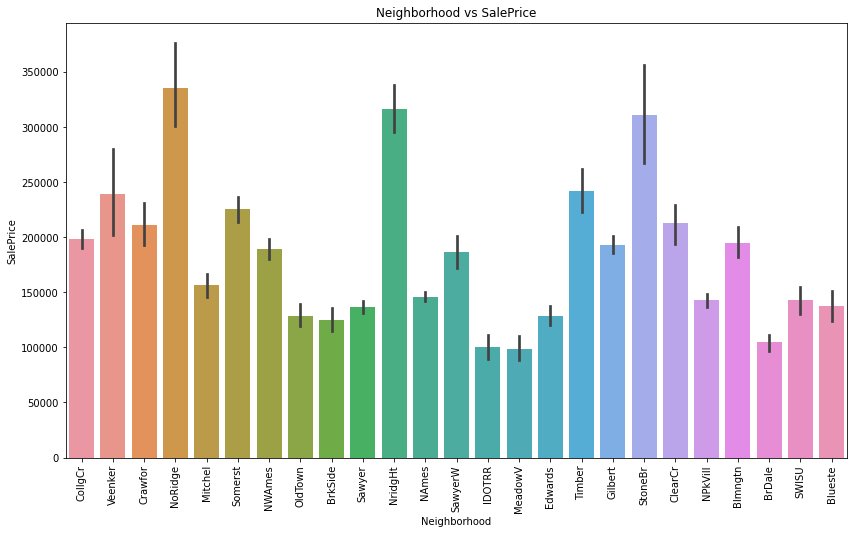

In [162]:
plt.figure(figsize=(14, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= house)
plt.title("Neighborhood vs SalePrice")
plt.xticks(rotation=90)

**Overall Quality vs SalePrice**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

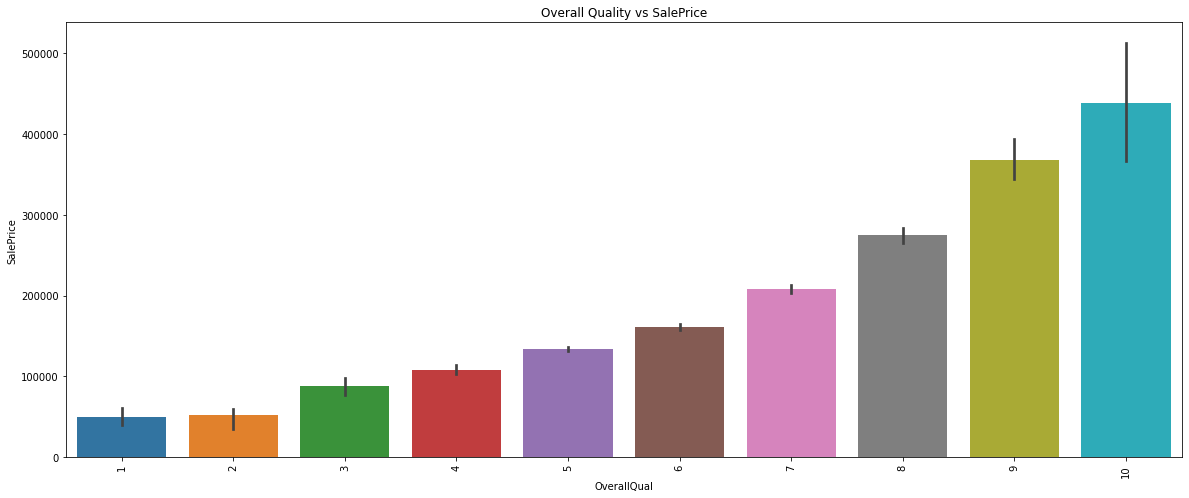

In [163]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house)
plt.title("Overall Quality vs SalePrice")
plt.xticks(rotation=90)

Sale price increases as the overall quality increased.

**Overall Condition vs SalePrice**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

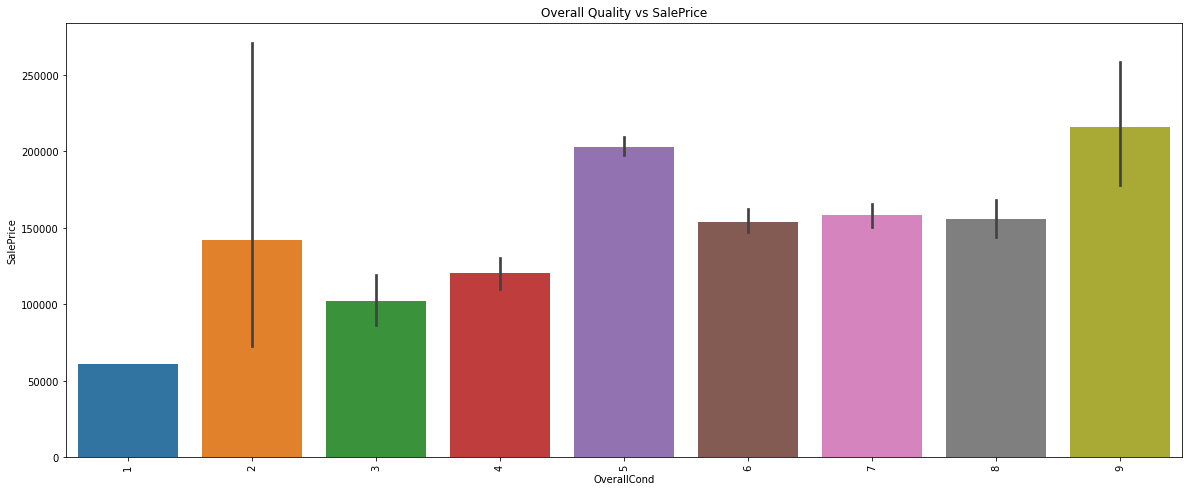

In [164]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= house)
plt.title("Overall Quality vs SalePrice")
plt.xticks(rotation=90)

**MSZoning vs SalePrice**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

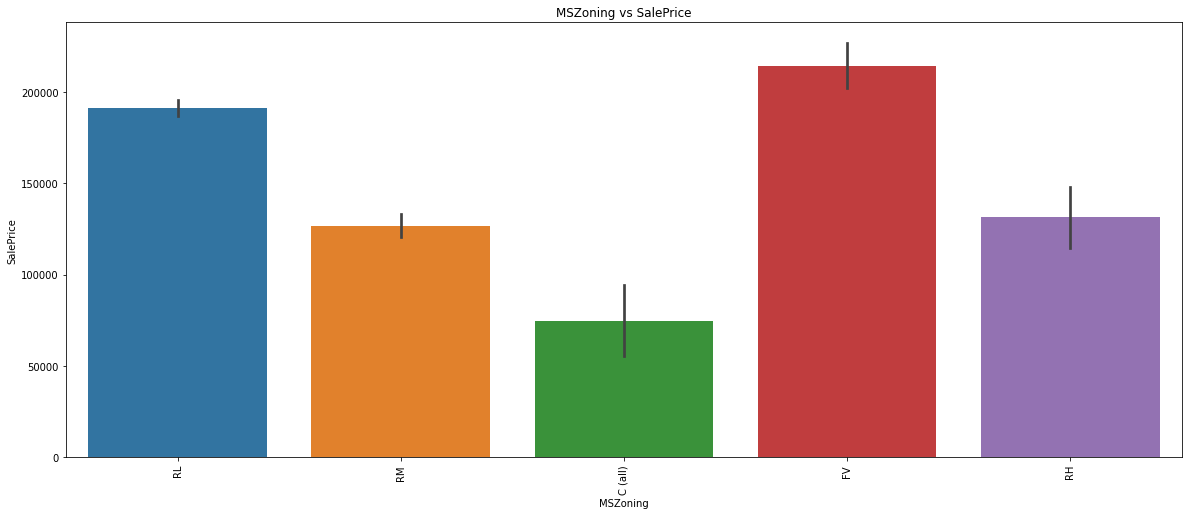

In [165]:
plt.figure(figsize=(20, 8))
sns.barplot(x="MSZoning", y="SalePrice", data= house)
plt.title("MSZoning vs SalePrice")
plt.xticks(rotation=90)

**CentralAir vs SaltePrice**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

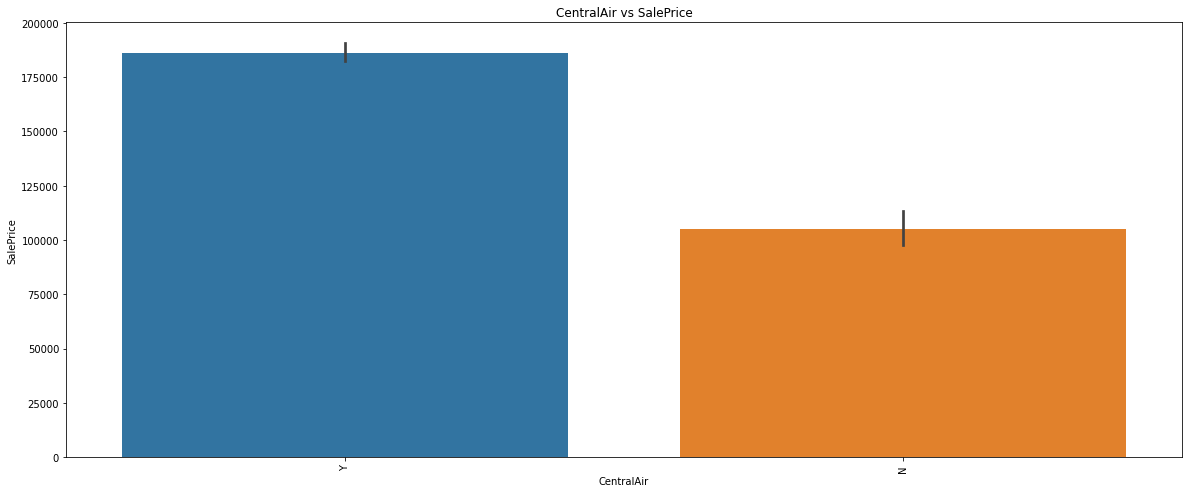

In [166]:
plt.figure(figsize=(20, 8))
sns.barplot(x="CentralAir", y="SalePrice", data= house)
plt.title("CentralAir vs SalePrice")
plt.xticks(rotation=90)

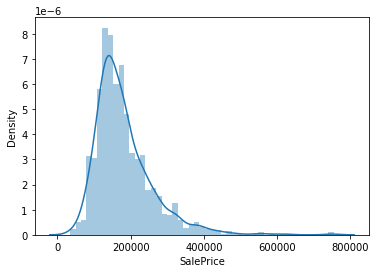

In [167]:
sns.distplot(house['SalePrice'])

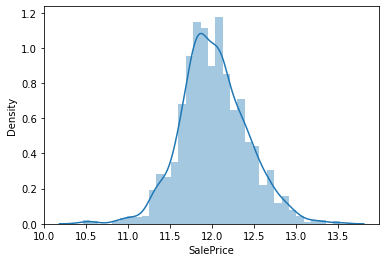

In [168]:
house['SalePrice'] = np.log1p(house['SalePrice'])
sns.distplot(house['SalePrice'])

**Get all the numerical variable in data set.**



In [169]:
house_numerical = house.select_dtypes(include=['float64', 'int64'])
house_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429220


**Check whether the cnt variable (target variable) has any linear relationship with any of the other numerical variable or not. To ensure linear regression make sense **

In [170]:
# This is commented as it is taking time to generate the pairplot.

# sns.pairplot(house_numerical, size = 2.5)
# plt.show()

**Correlation Matrix**

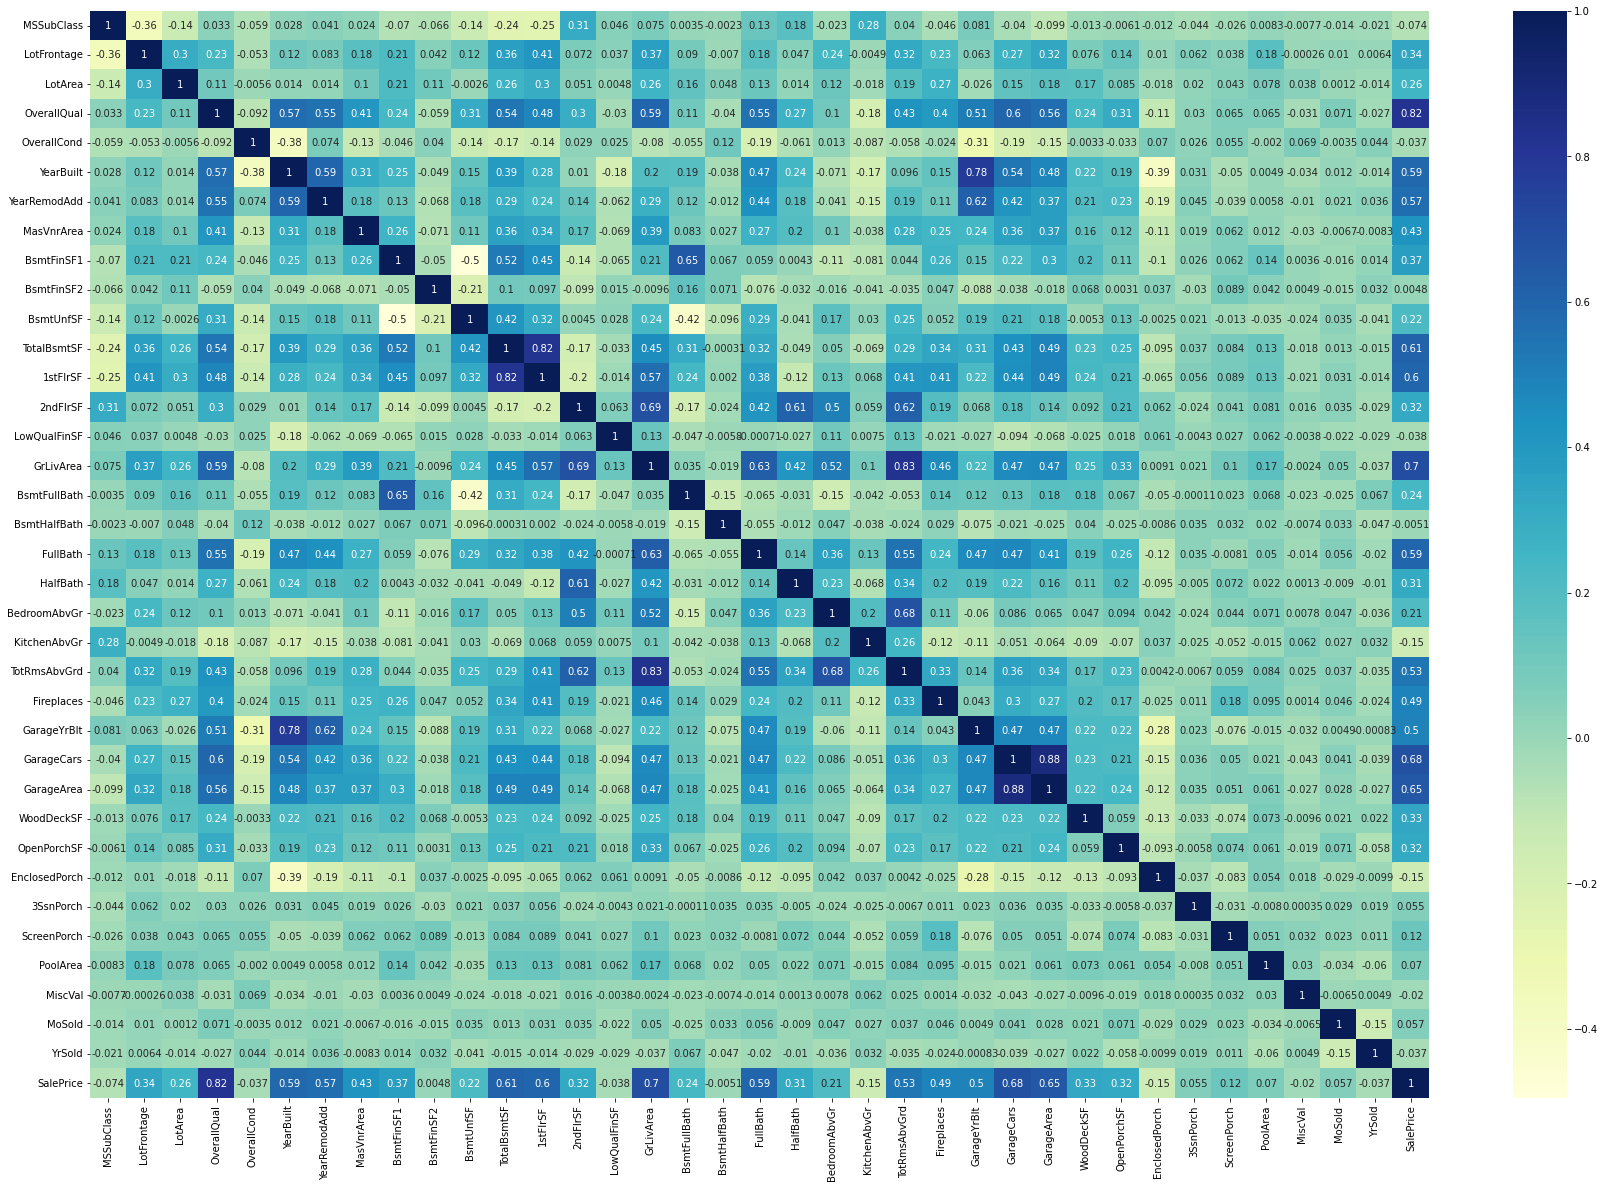

In [171]:
plt.figure(figsize=(30,20))

sns.heatmap(house_numerical.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [172]:
# print(house["TotRmsAbvGrd"].value_counts())
# print(house["GarageCars"].value_counts())
# print(house["BsmtUnfSF"].value_counts())

print(house["CentralAir"].value_counts())


Y    1365
N      95
Name: CentralAir, dtype: int64


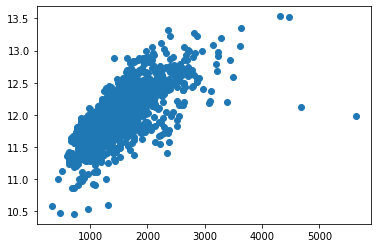

In [173]:
# GrLivArea vs SalePrice scatter plot

plt.scatter(house["GrLivArea"], house["SalePrice"])

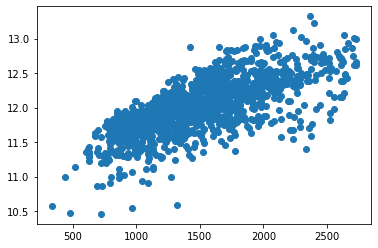

In [174]:
# remove outliers in GrLivArea
q3 = house["GrLivArea"].quantile(0.75)
q1 = house["GrLivArea"].quantile(0.25)
IQR = q3 - q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

house = house[(house["GrLivArea"] < upper) & (house["GrLivArea"] > lower)]
plt.scatter(house["GrLivArea"], house["SalePrice"])

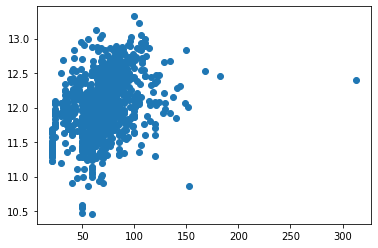

In [175]:
# LotFrontage vs SalePrice
plt.scatter(house["LotFrontage"], house["SalePrice"])

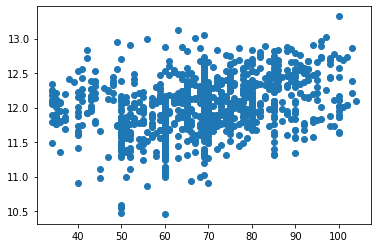

In [176]:
# remove outliers in LotFrontage
q3 = house["LotFrontage"].quantile(0.75)
q1 = house["LotFrontage"].quantile(0.25)
IQR = q3 - q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

house = house[(house["LotFrontage"] < upper) & (house["LotFrontage"] > lower)]
plt.scatter(house["LotFrontage"], house["SalePrice"])

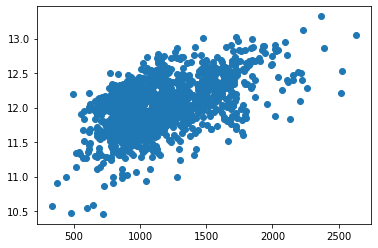

In [177]:
# 1stFlrSF vs SalePrice
plt.scatter(house["1stFlrSF"], house["SalePrice"])

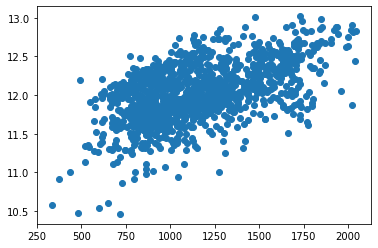

In [178]:
# remove outliers in 1stFlrSF
q3 = house["1stFlrSF"].quantile(0.75)
q1 = house["1stFlrSF"].quantile(0.25)
IQR = q3 - q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

house = house[(house["1stFlrSF"] < upper) & (house["1stFlrSF"] > lower)]
plt.scatter(house["1stFlrSF"], house["SalePrice"])

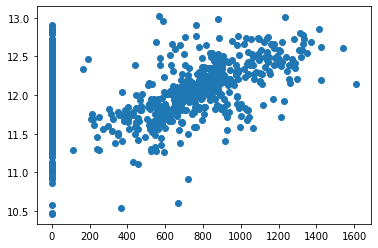

In [179]:
# 2ndFlrSF vs SalePrice
plt.scatter(house["2ndFlrSF"], house["SalePrice"])

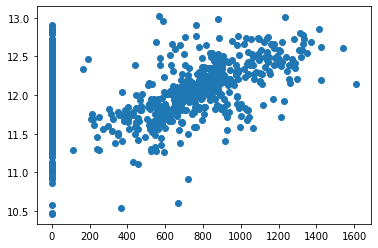

In [180]:
# remove outliers in 2ndFlrSF
q3 = house["2ndFlrSF"].quantile(0.75)
q1 = house["2ndFlrSF"].quantile(0.25)
IQR = q3 - q1
upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

house = house[(house["2ndFlrSF"] < upper) & (house["2ndFlrSF"] > lower)]
plt.scatter(house["2ndFlrSF"], house["SalePrice"])

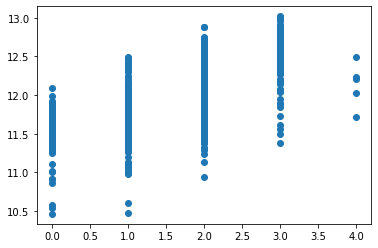

In [181]:
# GarageCars vs SalePrice
plt.scatter(house["GarageCars"], house["SalePrice"])

In [182]:
# GarageCards is not co-related with Sale Price
house = house.drop(['GarageCars'], axis = 1)

**TotRmsAbvGrd vs SalePrice**


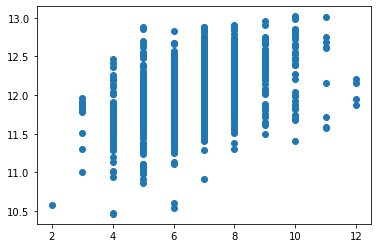

In [183]:
# TotRmsAbvGrd vs SalePrice
plt.scatter(house["TotRmsAbvGrd"], house["SalePrice"])

In [184]:
# TotRmsAbvGrd is not co-related with Sale Price
house = house.drop(['TotRmsAbvGrd'], axis = 1)

# Categorical Variable Outlier analysis

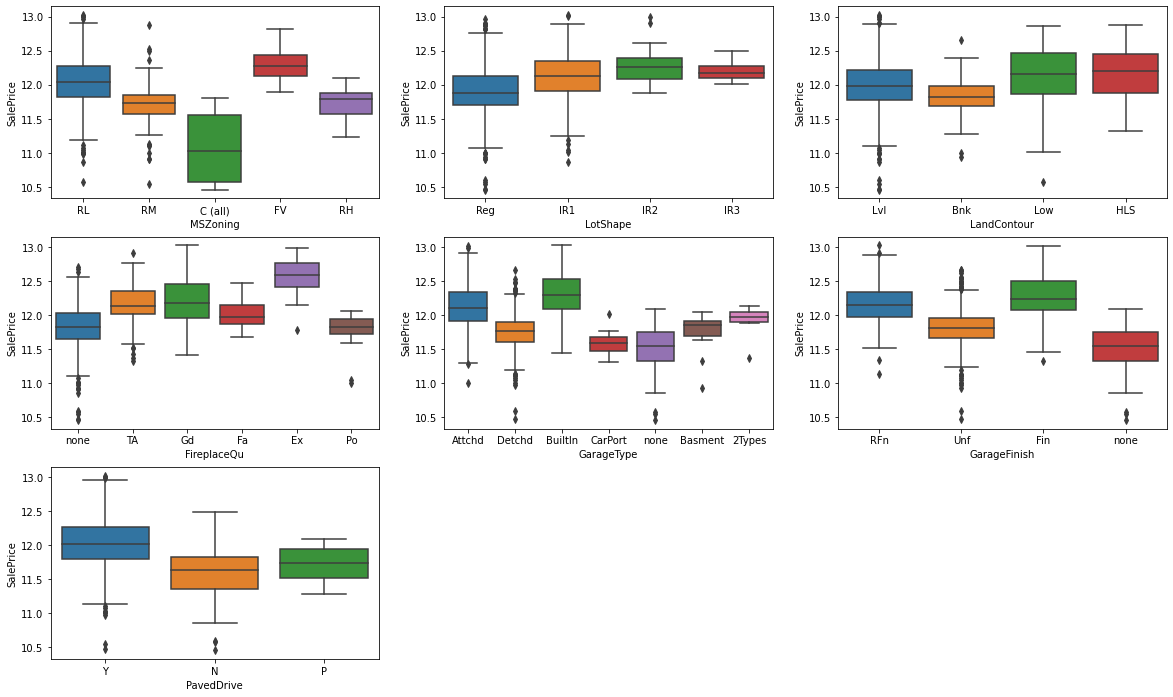

In [185]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x="MSZoning", y="SalePrice", data=house)
plt.subplot(3,3,2)
sns.boxplot(x="LotShape", y="SalePrice", data=house)
plt.subplot(3,3,3)
sns.boxplot(x="LandContour", y="SalePrice", data=house)
plt.subplot(3,3,4)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=house)
plt.subplot(3,3,5)
sns.boxplot(x="GarageType", y="SalePrice", data=house)
plt.subplot(3,3,6)
sns.boxplot(x="GarageFinish", y="SalePrice", data=house)
plt.subplot(3,3,7)
sns.boxplot(x="PavedDrive", y="SalePrice", data=house)
plt.show()

**Derive Property age**

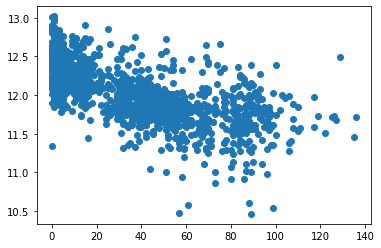

In [186]:
house['Age'] = (house['YrSold'] - house['YearBuilt'])

# Age vs SalePrice
plt.scatter(house["Age"], house["SalePrice"])

In [187]:
house["Street"].value_counts()

Pave    1288
Grvl       4
Name: Street, dtype: int64

Street columns has low variance value, hance it will not have any major impact on the model. Delete it.

In [188]:
house = house.drop(['Street'], axis = 1)

In [189]:
house["Utilities"].value_counts()

AllPub    1291
NoSeWa       1
Name: Utilities, dtype: int64

All values of Utilities is same, hence remove this column

In [190]:
house = house.drop(['Utilities'], axis = 1)

In [191]:
# check the features having variance less than 1%
variance = house.var()
variable = []
columns = house.columns
for i in range(0,len(variance)):
    if variance[i]<=0.006: #setting the threshold as 1%
        variable.append(columns[i])

print(variable)

[]


In [192]:
house["MiscVal"].value_counts()


0        1243
400        11
500         8
700         5
450         4
600         4
2000        3
480         2
1200        2
54          1
8300        1
1400        1
620         1
800         1
1300        1
3500        1
15500       1
350         1
2500        1
Name: MiscVal, dtype: int64

**Categorical variables in data**

In [193]:
house_categorical_columns = house.select_dtypes(include=['object'])
house_categorical_columns.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Gd,Typ,none,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


#Dummy variable creation for categorical variable

For Ordinal categorical data we will be doing label encoding. And for categorical data we will generating the dummy variable.

In [194]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ordinal_categorical = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for i in ordinal_categorical:
  house[i] = le.fit_transform(house[i])

In [195]:
house = pd.get_dummies(house, drop_first=True )
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,2,4,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,4,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,2,4,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,3,4,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,2,4,...,0,0,0,0,1,0,0,0,1,0


In [196]:
X = house.drop(['SalePrice'], axis = 1)
Y = house['SalePrice']

# Splitting the data into train and test


In [197]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=50)

**Rescaling the features**

In [198]:
# Rescaling the numerical features to bring all the columns togethter.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numerical = X_train.select_dtypes(include=['float64', 'int64'])


X_train[numerical.columns] = scaler.fit_transform(X_train[numerical.columns])
X_train.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1301,0.294118,0.500000,0.035192,0.555556,0.75,0.510949,0.000000,0.000000,1.000000,1.0,...,0,0,0,0,1,0,0,0,1,0
1251,0.588235,0.500000,0.007400,0.666667,0.50,0.956204,0.883333,0.101875,0.666667,1.0,...,0,0,0,0,1,0,0,0,1,0
1421,0.588235,0.271429,0.013176,0.555556,0.50,0.766423,0.450000,0.000000,1.000000,1.0,...,0,0,0,0,1,0,0,0,1,0
1365,0.235294,0.500000,0.035192,0.666667,0.50,0.934307,0.833333,0.000000,0.666667,1.0,...,0,0,0,0,1,0,0,0,1,0
525,0.000000,0.400000,0.035192,0.666667,0.50,0.970803,0.916667,0.000000,0.666667,1.0,...,0,0,0,0,1,0,0,0,1,0


# Model Building

**Linear Regression**

In [199]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [200]:
lm = LinearRegression()

lm.fit(X_train, y_train)
 
rfe = RFE(lm, n_features_to_select=100,step=1)            
rfe = rfe.fit(X_train, y_train)

In [201]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 6),
 ('LotFrontage', False, 29),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', False, 63),
 ('ExterQual', False, 58),
 ('ExterCond', False, 48),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 89),
 ('BsmtExposure', False, 61),
 ('BsmtFinType1', False, 56),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 53),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 27),
 ('FullBath', False, 15),
 ('HalfBath', False, 16),
 ('BedroomAbvGr', False, 46),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('Fireplaces', True, 1),
 ('FireplaceQu', False, 77),
 ('GarageYrBlt', False, 97),
 ('GarageArea', True, 1),
 ('GarageQual', False, 47),
 ('GarageCond', False, 13),
 

In [202]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtQual', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'YrSold', 'Age', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansa

In [203]:
X_train_rfe = X_train[col]

In [204]:
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,GarageFinish_none,SaleType_CWD,SaleType_Con,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
1301,0.035192,0.555556,0.75,0.510949,0.000000,0.75,0.302210,0.833333,0.0,0.109482,...,0,0,0,0,0,0,0,0,1,0
1251,0.007400,0.666667,0.50,0.956204,0.883333,0.50,0.000000,0.833333,0.0,0.686706,...,0,0,0,0,0,0,0,0,1,0
1421,0.013176,0.555556,0.50,0.766423,0.450000,0.50,0.198895,0.833333,0.0,0.346530,...,0,0,0,0,0,0,0,0,1,0
1365,0.035192,0.666667,0.50,0.934307,0.833333,0.50,0.294475,0.833333,0.0,0.137341,...,0,0,0,0,0,0,0,0,1,0
525,0.035192,0.666667,0.50,0.970803,0.916667,0.50,0.000000,0.833333,0.0,0.614370,...,0,0,0,0,0,0,0,0,1,0


In [205]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9442010098375585

In [206]:
# we should also scale the test data.

numerical_test = X_test.select_dtypes(include=['float64', 'int64'])

X_test[numerical_test.columns] = scaler.fit_transform(X_test[numerical_test.columns])
# X_train.head()

y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-8.759721460494725e+20

**Lasso and ridge**

In [207]:
# Applying Lasso

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [208]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.155298,0.026131,0.006951,0.001994,0.0001,{'alpha': 0.0001},-0.071535,-0.079079,-0.090549,-0.072447,...,-0.079765,0.007318,1,-0.063486,-0.062750,-0.059511,-0.063305,-0.060917,-0.061994,0.001539
1,0.057088,0.002713,0.010697,0.001541,0.001,{'alpha': 0.001},-0.079013,-0.079764,-0.090152,-0.076668,...,-0.082176,0.004887,2,-0.075929,-0.075624,-0.071802,-0.076001,-0.074852,-0.074841,0.001573
2,0.025088,0.006910,0.008770,0.001901,0.01,{'alpha': 0.01},-0.101955,-0.118978,-0.141789,-0.129644,...,-0.119525,0.014904,3,-0.114323,-0.113403,-0.113402,-0.116289,-0.112546,-0.113993,0.001279
3,0.016833,0.006035,0.005982,0.001896,0.05,{'alpha': 0.05},-0.203251,-0.230881,-0.271485,-0.239498,...,-0.229593,0.025549,4,-0.232328,-0.225370,-0.222995,-0.229928,-0.229298,-0.227984,0.003350
4,0.010300,0.002037,0.006224,0.003074,0.1,{'alpha': 0.1},-0.266804,-0.290571,-0.329420,-0.308551,...,-0.293920,0.022837,5,-0.299320,-0.293706,-0.286435,-0.291458,-0.297680,-0.293720,0.004587


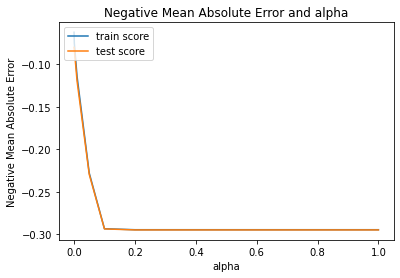

In [209]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [210]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.65264367e-01,
        0.00000000e+00,  0.00000000e+00,  1.82576663e-01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -4.78465822e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.10129665e-01, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.32991408e-03,
        3.21481209e-02,  0.00000000e+00, -0.00000000e+00,  5.68665362e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.04136349e-02,  0.00000000e+00,
       -4.76211936e-02,  0.00000000e+00,  5.45175877e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -5.19751330e-02,  0.00000000e+00,
       -0.00000000e+00,  3.65895022e-02, -2.04312078e-02,  0.00000000e+00,
        0.00000000e+00, -

In [211]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.334),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.365),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.183),
 ('MasVnrArea', 0.0),
 ('ExterQual', -0.0),
 ('ExterCond', 0.0),
 ('BsmtQual', -0.048),
 ('BsmtCond', 0.0),
 ('BsmtExposure', -0.0),
 ('BsmtFinType1', -0.0),
 ('BsmtFinSF1', 0.11),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', -0.004),
 ('1stFlrSF', 0.032),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.569),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('KitchenQual', -0.01),
 ('Fireplaces', 0.0),
 ('FireplaceQu', -0.048),
 ('GarageYrBlt', 0.0),
 ('GarageArea', 0.055),
 ('GarageQual', -0.0),
 ('GarageCond', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea',

In [212]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8182683367791923
0.743451791386014


In [213]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.17786653441015138


In [214]:
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']

para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.334
24,GrLivArea,0.569
4,OverallQual,0.365
7,YearRemodAdd,0.183
15,BsmtFinSF1,0.110
...,...,...
54,LotShape_Reg,-0.030
151,MasVnrType_None,-0.039
11,BsmtQual,-0.048
33,FireplaceQu,-0.048


In [215]:
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'YearRemodAdd', 'BsmtFinSF1', 'Foundation_PConc', 'GarageType_Attchd', 'GarageArea', 'CentralAir_Y', 'MSZoning_RL', '1stFlrSF', 'PavedDrive_Y', 'HeatingQC', 'KitchenQual', 'GarageType_none', 'MSZoning_RM', 'LotShape_Reg', 'MasVnrType_None', 'BsmtQual', 'FireplaceQu', 'Age']


In [216]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'YearRemodAdd', 'BsmtFinSF1', 'Foundation_PConc', 'GarageType_Attchd', 'GarageArea', 'CentralAir_Y', 'MSZoning_RL', '1stFlrSF', 'PavedDrive_Y', 'HeatingQC', 'KitchenQual', 'GarageType_none', 'MSZoning_RM', 'LotShape_Reg', 'MasVnrType_None', 'BsmtQual', 'FireplaceQu', 'Age']
]
X_train_lasso.head()


,GrLivArea,OverallQual,YearRemodAdd,BsmtFinSF1,Foundation_PConc,GarageType_Attchd,GarageArea,CentralAir_Y,MSZoning_RL,1stFlrSF,PavedDrive_Y,HeatingQC,KitchenQual,GarageType_none,MSZoning_RM,LotShape_Reg,MasVnrType_None,BsmtQual,FireplaceQu,Age
1301,0.484545,0.555556,0.000000,0.302210,0,1,0.157080,1,1,0.244743,0,0.25,0.666667,0,0,0,1,0.75,0.4,0.492647
1251,0.447368,0.666667,0.883333,0.000000,1,1,0.352507,1,1,0.625584,1,0.00,0.666667,0,0,0,0,0.50,0.4,0.022059
1421,0.307018,0.555556,0.450000,0.198895,0,1,0.324484,1,1,0.429322,1,1.00,1.000000,0,0,1,1,0.50,0.2,0.242647
1365,0.559733,0.666667,0.833333,0.294475,1,1,0.488938,1,0,0.280374,1,0.00,0.666667,0,0,1,1,0.50,1.0,0.073529
525,0.389307,0.666667,0.916667,0.000000,1,1,0.334071,1,0,0.544393,1,0.00,0.666667,0,0,1,1,0.50,0.8,0.007353


In [217]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'YearRemodAdd', 'BsmtFinSF1', 'Foundation_PConc', 'GarageType_Attchd', 'GarageArea', 'CentralAir_Y', 'MSZoning_RL', '1stFlrSF', 'PavedDrive_Y', 'HeatingQC', 'KitchenQual', 'GarageType_none', 'MSZoning_RM', 'LotShape_Reg', 'MasVnrType_None', 'BsmtQual', 'FireplaceQu', 'Age']
]
X_test_lasso.head()


,GrLivArea,OverallQual,YearRemodAdd,BsmtFinSF1,Foundation_PConc,GarageType_Attchd,GarageArea,CentralAir_Y,MSZoning_RL,1stFlrSF,PavedDrive_Y,HeatingQC,KitchenQual,GarageType_none,MSZoning_RM,LotShape_Reg,MasVnrType_None,BsmtQual,FireplaceQu,Age
228,0.116618,0.285714,0.283333,0.511543,0,0,0.241727,1,1,0.269554,1,1.0,1.000000,0,0,1,1,0.75,0.2,0.341270
23,0.188533,0.285714,0.433333,0.510328,1,1,0.411511,1,0,0.365223,1,1.0,1.000000,0,1,1,1,0.50,0.8,0.246032
1200,0.093294,0.142857,0.333333,0.000000,0,1,0.201439,1,1,0.238526,1,0.5,1.000000,0,0,1,1,0.75,1.0,0.285714
628,0.684159,0.285714,0.316667,0.394897,1,1,0.362590,1,1,0.352295,1,1.0,0.333333,0,0,0,0,0.50,0.8,0.301587
26,0.110787,0.285714,0.833333,0.142163,0,0,0.414388,1,1,0.261797,1,1.0,0.666667,0,0,1,1,0.75,1.0,0.468254


**Ridge Regression**

In [218]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

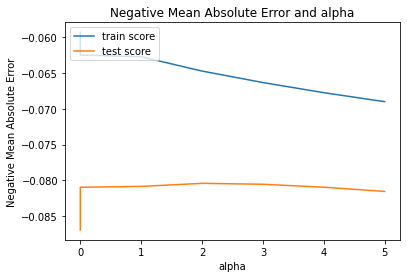

In [219]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [220]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.20125523e-02,  5.67168805e-02,  1.49851648e-01,  3.52551751e-01,
        2.73836284e-01,  1.21466555e-01,  7.65337370e-02,  5.83180544e-03,
       -1.55387824e-02,  2.20380864e-02, -5.89558422e-02,  1.01414731e-02,
       -1.75732541e-02, -2.22114386e-02,  1.49045443e-01,  2.35832715e-02,
        3.91666851e-02,  4.89429775e-02,  1.29148608e-01, -2.32267583e-02,
        2.82468364e-01,  1.61268384e-01,  9.39267945e-03,  3.07810562e-01,
        1.04976665e-01,  3.86982340e-03,  8.79928994e-02,  5.60013857e-02,
        4.00394863e-02, -4.20941604e-02, -4.64975933e-02,  7.39235154e-02,
       -5.54868561e-03, -5.25008655e-03,  1.38701970e-01,  1.82665292e-02,
       -4.18875938e-02,  9.33442059e-02,  5.81742410e-02,  3.78525872e-02,
        1.84851144e-02,  4.42199974e-02,  9.13308376e-02,  3.84934542e-03,
       -2.98797805e-02, -2.61050369e-02, -1.23127487e-01,  1.58905337e-01,
        1.28294330e-01,  1.55399176e-01,  1.26011697e-01,  2.07383073e-02,
       -1.23517444e-02, -

In [221]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.532),
 ('MSSubClass', -0.052),
 ('LotFrontage', 0.057),
 ('LotArea', 0.15),
 ('OverallQual', 0.353),
 ('OverallCond', 0.274),
 ('YearBuilt', 0.121),
 ('YearRemodAdd', 0.077),
 ('MasVnrArea', 0.006),
 ('ExterQual', -0.016),
 ('ExterCond', 0.022),
 ('BsmtQual', -0.059),
 ('BsmtCond', 0.01),
 ('BsmtExposure', -0.018),
 ('BsmtFinType1', -0.022),
 ('BsmtFinSF1', 0.149),
 ('BsmtFinType2', 0.024),
 ('BsmtFinSF2', 0.039),
 ('BsmtUnfSF', 0.049),
 ('TotalBsmtSF', 0.129),
 ('HeatingQC', -0.023),
 ('1stFlrSF', 0.282),
 ('2ndFlrSF', 0.161),
 ('LowQualFinSF', 0.009),
 ('GrLivArea', 0.308),
 ('BsmtFullBath', 0.105),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.088),
 ('HalfBath', 0.056),
 ('BedroomAbvGr', 0.04),
 ('KitchenAbvGr', -0.042),
 ('KitchenQual', -0.046),
 ('Fireplaces', 0.074),
 ('FireplaceQu', -0.006),
 ('GarageYrBlt', -0.005),
 ('GarageArea', 0.139),
 ('GarageQual', 0.018),
 ('GarageCond', -0.042),
 ('WoodDeckSF', 0.093),
 ('OpenPorchSF', 0.058),
 ('EnclosedPorch', 0.038),
 

In [222]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9366542455730273
0.8186071136338461


In [223]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14956152189092234


In [224]:
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)

predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,10.532
4,OverallQual,0.353
24,GrLivArea,0.308
21,1stFlrSF,0.282
5,OverallCond,0.274
...,...,...
161,Heating_Grav,-0.073
70,Neighborhood_IDOTRR,-0.086
174,Functional_Sev,-0.087
47,Age,-0.123


# Result

Housing company should keep a check on the features with higher positive coefficient. As the SalePrice will increase with the increase of such variables. Like:

*   OverallQual (Rates the overall material and finish of the house)
*   GrLivArea (Above grade (ground) living area square feet)
*   1stFlrSF (First Floor square feet)
*   OverallCond (Rates the overall condition of the house)

Also, variable with higher negative coefficient should be considered. AS with increasing negative value will result in decrease in Sale Price.

Like:
*   Neighborhood_MeadowV.
*   Age.
*   Functional_Sev








